CSE 446, Winter 2018
Machine Learning By ワシントン大学


https://courses.cs.washington.edu/courses/cse446/18wi/sections/section8/XOR-Pytorch.html

Unable to Learn XOR Representation using 2 layers of Multi-Layered Perceptron (MLP)

https://discuss.pytorch.org/t/unable-to-learn-xor-representation-using-2-layers-of-multi-layered-perceptron-mlp/13287


In [8]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [0]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [0]:
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = self.lin2(x)
        return x
      
model = XOR()

In [0]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [0]:
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [13]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 500 == 0:
#         print(loss.data.numpy())
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 4.070035457611084, 
Epoch: 500, Loss: 0.0003096739819739014, 
Epoch: 1000, Loss: 1.2789769243681803e-13, 
Epoch: 1500, Loss: 1.4210854715202004e-14, 
Epoch: 2000, Loss: 1.2789769243681803e-13, 


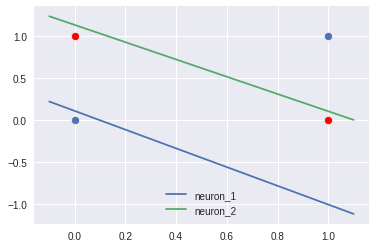

In [14]:
model_params = list(model.parameters())

model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()


# その他

https://github.com/epochventures/PyTorch/blob/master/XOR.py

In [15]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50) # 2 Input noses, 50 in middle layers
        self.fc2 = nn.Linear(50, 1) # 50 middle layer, 1 output nodes
        self.rl1 = nn.ReLU()
        self.rl2 = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.rl1(x)
        x = self.fc2(x)
        x = self.rl2(x)
        return x

if __name__ == "__main__":
    ## Create Network

    net = Net()
    #print net

    ## Optimization and Loss

    #criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
    criterion = nn.MSELoss()
    #criterion = nn.L1Loss()
    #criterion = nn.NLLLoss()
    #criterion = nn.BCELoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.1)
    #optimizer = optim.Adam(net.parameters(), lr=0.01)

    trainingdataX = [[[0.01, 0.01], [0.01, 0.90], [0.90, 0.01], [0.95, 0.95]], [[0.02, 0.03], [0.04, 0.95], [0.97, 0.02], [0.96, 0.95]]]
    trainingdataY = [[[0.01], [0.90], [0.90], [0.01]], [[0.04], [0.97], [0.98], [0.1]]]
    NumEpoches = 20
    for epoch in range(NumEpoches):

        running_loss = 0.0
        for i, data in enumerate(trainingdataX, 0):
            inputs = data
            labels = trainingdataY[i]
            inputs = Variable(torch.FloatTensor(inputs))
            labels = Variable(torch.FloatTensor(labels))
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()        
            optimizer.step()
            running_loss += loss.data[0]
            if i % 1000 == 0:
                print("loss: ", running_loss)
                running_loss = 0.0
    print("Finished training...")
    print(net(Variable(torch.FloatTensor(trainingdataX[0]))))

loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
loss:  tensor(0.4050)
Finished training...
tensor(1.00000e-02 *
       [[ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.7322]])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
